# Import Code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Science Tool - Map()/ Apply/ Lambda function

In [5]:
data = pd.read_csv('titanic.csv')

data.head()

data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## df.column.map(dict)

In [3]:
# females = 1
# males = 1
sex_list = data.Sex.unique().tolist()

sex_list

dummies = [0,1]

sex_dict = dict(zip(sex_list, dummies))

sex_dict

# df.col.map(dict for mapping data)
Sex_Numeric = data.Sex.map(sex_dict)

data['Sex_Numeric'] = Sex_Numeric

data.head()

data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_Numeric'],
      dtype='object')

In [163]:
data['Sex_Numeric']  = data.Sex.map(sex_dict)

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_cat,age_cat1,Sex_Numeric
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,young,Mature,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,young,Mature,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,young,Mature,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,young,Mature,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,young,Mature,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,young,Mature,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,young,Young,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,older,Older,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,young,Mature,0


## question 3 - calculate the percentage of percentage of females 

In [33]:

data.Sex.value_counts(normalize = True)

data.Sex_Numeric.mean()

# series can also perform vectorized operation
data.Sex.value_counts()/data.shape[0]

male      0.647587
female    0.352413
Name: Sex, dtype: float64

## question 4

In [47]:

# Create a new variable called “Fare_ceil” to show the fare value of the trip rounded up.

# df.round()
import numpy as np
data.Fare.round(1)

# df.apply(func, axis = index or 'columns')  <- # df.apply(function)
# apply to vectorized operation
data.Fare.apply(np.ceil)

# max
data.Fare.agg('max')

512.3292

## 5. Load the drinks.csv dataset into a dataset called drinks.

In [50]:


drinks = pd.read_csv('drinks.csv')

drinks.sample(10)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
31,Cameroon,147,1,4,5.8,Africa
98,Lithuania,343,244,56,12.9,Europe
54,El Salvador,52,69,2,2.2,North America
4,Angola,217,57,45,5.9,Africa
162,Sudan,8,13,0,1.7,Africa
172,Togo,36,2,19,1.3,Africa
126,Norway,169,71,129,6.7,Europe
19,Bhutan,23,0,0,0.4,Asia
160,Spain,284,157,112,10.0,Europe
96,Liberia,19,152,2,3.1,Africa


## 6. Find the max beer, spirit, and wine servings among all countries.

In [51]:


# apply the function all these columnwise 
drinks.iloc[:,1:4].apply(max)

beer_servings      376
spirit_servings    438
wine_servings      370
dtype: int64

## 7 show the max beer of the countires

In [52]:

drinks.iloc[:,1:4].apply(max, axis = 1)

0        0
1      132
2       25
3      312
4      217
      ... 
188    333
189    111
190      6
191     32
192     64
Length: 193, dtype: int64

In [53]:
# 8. Find the max category of serving among beer, spirit, and wine for each country.

# tell you which country has the maximum beer serving
drinks.iloc[:,1:4].apply(np.argmax, axis = "columns")



/Users/kwlwman2/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


0        beer_servings
1      spirit_servings
2        beer_servings
3        wine_servings
4        beer_servings
            ...       
188      beer_servings
189      beer_servings
190      beer_servings
191      beer_servings
192      beer_servings
Length: 193, dtype: object

## 9. Creata a function that take a input value x and returns it four-fold.

In [6]:
def four_fold(x):
    return 4*x 

## 10. Create a new column in the drinks dataset beer_4fold which multiplies the value of the beer servings in each country by 4.

In [56]:
## 类似 r 里面的 vapply（func， arg for fucn）
drinks.beer_servings.apply(four_fold)

0         0
1       356
2       100
3       980
4       868
       ... 
188    1332
189     444
190      24
191     128
192     256
Name: beer_servings, Length: 193, dtype: int64

## lambda funtion

In [57]:


drinks.beer_servings.apply(lambda x: x*4)

0         0
1       356
2       100
3       980
4       868
       ... 
188    1332
189     444
190      24
191     128
192     256
Name: beer_servings, Length: 193, dtype: int64

## access the last lambda you just created

In [70]:
lambda x: x*4


<function __main__.<lambda>(x)>

In [71]:
# lambda 用完一次 就会被删除，必须在运行一次 lambda 再peform 一次计算

_(10)

40

In [72]:
# two variables

lambda x,y: x + y

<function __main__.<lambda>(x, y)>

In [ ]:
_(2,3)

# 2. Data Wrangling

## 12. Find all passangers who are above 30 years old.

In [7]:

# Filtering Data
age_30 = data.query("Age > 30")

# 我们 index-wise 这样子 一行一行看 Age 是否 > 30 所以要把 condi 放在 row 的位置上
age_30_b = data.loc[data.Age > 30,:]

## 13. Find all female passangers who are above 30 years old.


In [11]:
import numpy as np

age_30_f = data.query('Age > 30 & Sex == "female"')

# age_30_b

age_30_c = data[np.logical_and(data.Age > 30, data.Sex == 'female')]

age_30_c

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


## 14. Create a dataframe which has only two columns: PassengerId, Survived, and Cabin. 

In [13]:
q14 = data.loc[:,['PassengerId',"Survived",'Cabin']]

q14

,PassengerId,Survived,Cabin
0,1,0,NaN
1,2,1,C85
2,3,1,NaN
3,4,1,C123
4,5,0,NaN
...,...,...,...
886,887,0,NaN
887,888,1,B42
888,889,0,NaN
889,890,1,C148


## 15. Create a dataframe that has all variables in the dataset except the “Cabin” variable.

In [17]:
data1 = data.copy()

# suggest axis = 'columns' and axis = 'index', except one column then we drop that column
data1.drop('Cabin', axis = 'columns')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## 16. Find all female passangers who are above 30 years old. The resulting dataframe should have three columns: PassengerId, Survived, Age. The dataframe should be arranged by age in descending order

In [23]:
# data.loc[row_condit, column]
a16 = data.loc[np.logical_and(data.Sex == 'female',data.Age > 30),
               ["PassengerId", "Survived", "Age"]]

a16.sort_values(by = 'Age', ascending = False)

,PassengerId,Survived,Age
275,276,1,63.0
483,484,1,63.0
829,830,1,62.0
366,367,1,60.0
195,196,1,58.0
...,...,...,...
215,216,1,31.0
328,329,1,31.0
18,19,0,31.0
318,319,1,31.0


# Grouping and Summarizing Data

## 17. Find the average age of both male and female passangers.

In [24]:
data.groupby('Sex')["Age"].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

## 18. Find the median fare for passengers according to their class.


In [28]:
data.groupby('Pclass')['Fare'].median()

Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64

## 19. Find the average and median, and the difference between mean and median age of both male and female passangers.

In [39]:
q19 = data.groupby('Sex')['Age'].agg(["mean", "median"])

q19_2 = data.groupby('Sex')['Age'].agg(["mean", "median"])

q19["diff"] = q19['mean'] - q19['median']

q19

q19_2 = data.groupby('Sex')['Age'].agg({"mean":'mean',
                                        "median":'median',
                                        'Diff':lambda x: x.mean() - x.median()}
                                      )
q19_2

/Users/kwlwman2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  # This is added back by InteractiveShellApp.init_path()


,mean,median,Diff
Sex,,,
female,27.915709,27.0,0.915709
male,30.726645,29.0,1.726645


## 20. Find the average age for males and females who survived the Titanic disaster.


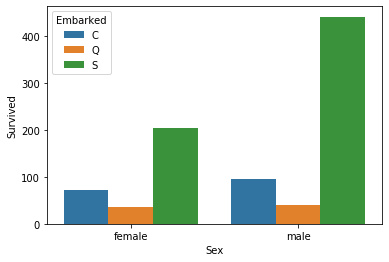

In [52]:
d1 = data.groupby(['Sex','Embarked'])["Survived"].count()

import seaborn as sns

d1 = d1.reset_index()

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data = d1)

In [54]:
d1 = data.groupby(['Sex','Survived'])["Age"].mean()

d1

Sex     Survived
female  0           25.046875
        1           28.847716
male    0           31.618056
        1           27.276022
Name: Age, dtype: float64

## 22. Create a new column (age_cat) in the dataset to based on the age variable (“young” if age <=50 otherwise “older”).


In [61]:
def yound_or_old(data):
    if data < 50:
        return 'young'
    else:
        return 'older'

data['age_cat'] = data['Age'].apply(yound_or_old)

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,young
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,young
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,young
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,young
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,young
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,older
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,young


##  23. Create a new column (age_cat1) in the dataset to based on the age variable (“young” if age <=20, “mature” if 20<age<=50 otherwise “older”).

In [64]:
def func1(x):
    if x <= 20:
        return 'young'
    elif 20<x<=50:
        return 'mature'
    else:
        return 'older'


data['age_cat1'] = data.Age.apply(func1)

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_cat,age_cat1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,young,mature
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,young,mature
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,young,mature
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,young,mature
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,young,mature
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,young,mature
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,young,young
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,older,older
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,young,mature


In [72]:
data['age_cat1'] = data.Age.apply(lambda x: 'Young' if x <= 20
                                  else('Mature' if 20<x<= 50 else 'Older'))

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_cat,age_cat1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,young,Mature
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,young,Mature
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,young,Mature
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,young,Mature
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,young,Mature
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,young,Mature
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,young,Young
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,older,Older
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,young,Mature


## 24. Create the following Tree map using the mpg.csv dataset and squarify Python package.

In [69]:
import matplotlib.pyplot as plt

df2 = pd.read_csv('mpg.csv')

df2

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [113]:
import squarify as sf

df3 = df2.groupby('class').size()

df3 = df3.to_frame()

df3 = df3.reset_index()

df3.columns = ['class','count']

df3


,class,count
0,2seater,5
1,compact,47
2,midsize,41
3,minivan,11
4,pickup,33
5,subcompact,35
6,suv,62


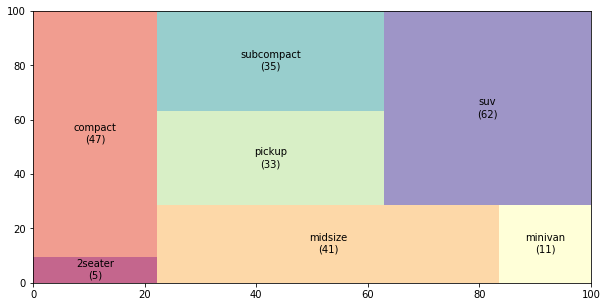

In [175]:
# these values define the coordinate system for the returned rectangles
# the values will range from x to x + width and y to y + height

plt.figure(figsize = (10,5))

labels = df3.apply(lambda x: str(x[0]) +'\n'+ "(" + str(x[1]) + ")", axis = 'columns')

a = plt.get_cmap('Spectral')(np.linspace(0,1,len(labels)))

sf.plot(sizes = df3['count'], label = labels, color = a, alpha = 0.6)

plt.show()


In [135]:
labels = df3.apply(lambda x: str(x[0]) +'\n'+ "(" + str(x[1]) + ")", axis = 'columns')

labels

0        2seater\n(5)
1       compact\n(47)
2       midsize\n(41)
3       minivan\n(11)
4        pickup\n(33)
5    subcompact\n(35)
6           suv\n(62)
dtype: object

## 25. create my own treemap

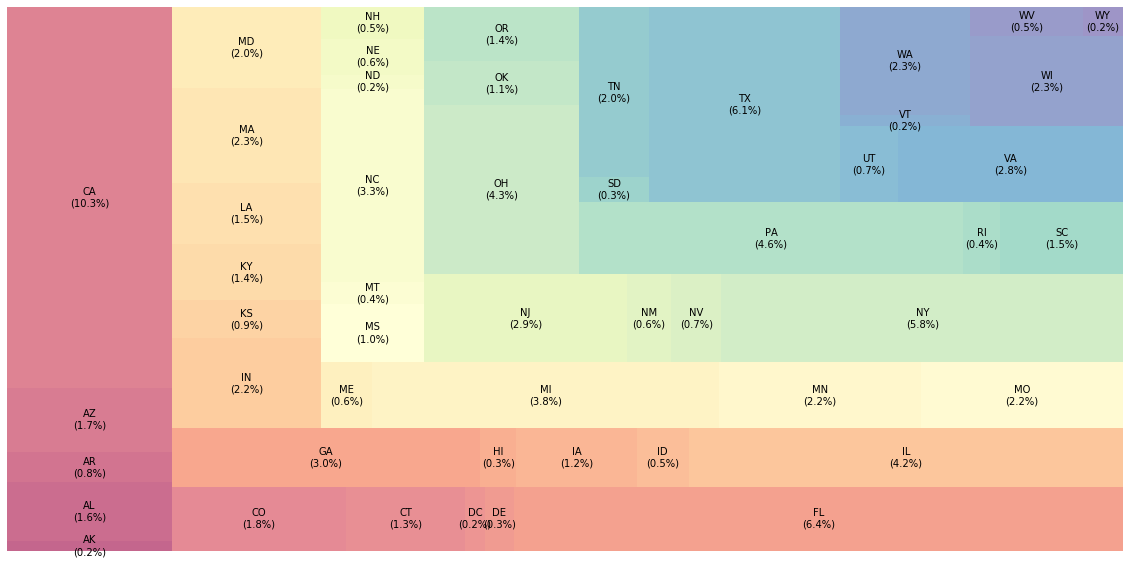

In [220]:
import squarify as sf 
import pandas as pd 
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20,10))

dataframe = pd.read_csv('2008_all_states.csv')

dataframe_gp = dataframe.groupby('state')['total_votes'].sum()

dataframe_df = dataframe_gp.reset_index()

# df['new_column']= df.col.map(func or dict)
percentage = dataframe_df.total_votes.map(lambda x: x /dataframe_df.total_votes.sum())

dataframe_df['percent'] = percentage


a = plt.get_cmap('Spectral')(np.linspace(0,1,len(dataframe_df['total_votes'])))


# 隔行符号 \n

#df.apply(lambda x: x[1] + x[2] + '%', axis = 'columns')

labels2 = dataframe_df.apply(lambda x: str(x[0]) + '\n' +'(' + str(round(x[2]*100,1))+'%'+ ')', axis = 'columns')

# sf.plot(sizes = x[column], label = labels, color = plt.get_cmap('Spectral')(np.linspace(0,1,len(labels2))))
sf.plot(sizes = dataframe_df['percent'],label = labels2, color = a, alpha = 0.6)

plt.axis(False)
 
plt.show()

## Create percentage columns

In [208]:

dataframe_df['percentage'] = dataframe_df.total_votes.map(lambda x: x/dataframe_df.total_votes.sum()) 

dataframe_df

,state,total_votes,percentage
0,AK,326197,0.002480
1,AL,2099819,0.015967
2,AR,1086617,0.008262
3,AZ,2293475,0.017439
4,CA,13561900,0.103123
5,CO,2401361,0.018260
6,CT,1646792,0.012522
7,DC,265853,0.002022
8,DE,412412,0.003136
9,FL,8390744,0.063802


In [196]:
dataframe_df['percentage'] = dataframe_df.total_votes/dataframe_df.total_votes.sum() 

dataframe_df.sort_values('percentage', ascending=False)

dataframe_df.iloc[:,0]

0     AK
1     AL
2     AR
3     AZ
4     CA
5     CO
6     CT
7     DC
8     DE
9     FL
10    GA
11    HI
12    IA
13    ID
14    IL
15    IN
16    KS
17    KY
18    LA
19    MA
20    MD
21    ME
22    MI
23    MN
24    MO
25    MS
26    MT
27    NC
28    ND
29    NE
30    NH
31    NJ
32    NM
33    NV
34    NY
35    OH
36    OK
37    OR
38    PA
39    RI
40    SC
41    SD
42    TN
43    TX
44    UT
45    VA
46    VT
47    WA
48    WI
49    WV
50    WY
Name: state, dtype: object

In [210]:
dataframe_df.apply(lambda x: print(x[0],x[2]), axis = 'columns')

IndexError: ('index out of bounds', 'occurred at index 0')

In [214]:
dataframe_df

,state,total_votes,percent
0,AK,326197,0.002480
1,AL,2099819,0.015967
2,AR,1086617,0.008262
3,AZ,2293475,0.017439
4,CA,13561900,0.103123
5,CO,2401361,0.018260
6,CT,1646792,0.012522
7,DC,265853,0.002022
8,DE,412412,0.003136
9,FL,8390744,0.063802
